# Encoder-Decoder Model

Here, we will experiment with an Encoder-Decoder model for this sequence-to-sequence problem. We will primarily be following [this tutorial](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html).

Outline:\
I. Imports and Data\
II. Model Creation\
III. Model Training\
IV. Model Evaluation

## I. Imports and Data

In [1077]:
import numpy as np
import tensorflow as tf
import pandas as pd
import h5py
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Masking, Normalization, BatchNormalization, TimeDistributed

from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [1078]:
# Load data from the HDF5 file
with h5py.File('enc_dec_preprocessed_data.h5', 'r') as hf:
    x = hf["x"][:]
    y = hf["y"][:]
    decoder_inputs = hf["decoder_inputs"][:]

In [1079]:
x[0].shape

(21, 35)

In [1080]:
y[0].shape

(21, 35)

In [1081]:
decoder_inputs[0].shape

(21, 35)

In [1082]:
NUM_PLAYS = 21
NUM_FEATURES = 35
hidden_size = 128
EPOCHS = 20
BATCH_SIZE = 256
MASK_VAL = -1.1

In [1083]:
x[0]

array([[-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1

In [1084]:
decoder_inputs[1]

array([[-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1

In [1085]:
y[0]

array([[-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1

# Train-Test Split

In [1086]:
x_train, x_test, decoder_inputs_train, decoder_inputs_test, y_train, y_test = train_test_split(x, decoder_inputs, y, test_size=0.2, random_state=1819)

In [1087]:
x_train.shape, x_test.shape

((212103, 21, 35), (53026, 21, 35))

In [1088]:
y_train.shape, y_test.shape

((212103, 21, 35), (53026, 21, 35))

In [1089]:
decoder_inputs_train.shape, decoder_inputs_test.shape

((212103, 21, 35), (53026, 21, 35))

## Model Creation

### Encoder

In [1090]:
encoder_inputs = Input((NUM_PLAYS, NUM_FEATURES))
encoder_inputs = Masking(mask_value=MASK_VAL)(encoder_inputs)
encoder_inputs = BatchNormalization()(encoder_inputs)

encoder_lstm1 = LSTM(hidden_size, return_state=True, return_sequences=True)
encoder_outputs1, state_h1, state_c1 = encoder_lstm1(encoder_inputs)
encoder_states = [state_h1, state_c1]

encoder_lstm2 = LSTM(hidden_size, return_state=True, return_sequences=False) 
encoder_outputs2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1)
encoder_states = [state_h2, state_c2]

### Decoder

In [1091]:
decoder_inputs = Input((NUM_PLAYS, NUM_FEATURES))
decoder_inputs = BatchNormalization()(decoder_inputs)

# Deprecated
# No need for LSTM in decoder since only trying to predict a single vector
decoder_inputs = Masking(mask_value=MASK_VAL)(decoder_inputs)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_dense = Dense(NUM_FEATURES, activation="linear")
decoder_outputs = decoder_dense(decoder_inputs)


In [1092]:
print(f"Encoder mask: {encoder_inputs._keras_mask}")

Encoder mask: <KerasTensor shape=(None, 21), dtype=bool, sparse=False, name=keras_tensor_920>


### Full Model

In [1093]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [1094]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy", "MSE"])

In [1095]:
model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_930CL… │ (None, 21, 35)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_921CL… │ (None, 21, 35)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 21, 35)    │      1,260 │ keras_tensor_930… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,260 (4.92 KB)

 Trainable params: 1,260 (4.92 KB)

 Non-trainable params: 0 (0.00 B)

In [1100]:
print(f"x_train shape: {x_train.shape}")
print(f"decoder_inputs_train shape: {decoder_inputs_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (212103, 21, 35)
decoder_inputs_train shape: (212103, 21, 35)
y_train shape: (212103, 21, 35)


## Model Training

In [1097]:
history = model.fit([x_train, decoder_inputs_train], y_train,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=([x_test, decoder_inputs_test], y_test))

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_921CLONE', 'keras_tensor_930CLONE']. Received: the structure of inputs=('*', '*')
  warnings.warn(


829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 36021.9492 - accuracy: 0.1485 - loss: 36021.9453 - val_MSE: 17369.9824 - val_accuracy: 0.1181 - val_loss: 17369.9922
Epoch 2/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 17023.1289 - accuracy: 0.1214 - loss: 17023.1309 - val_MSE: 16406.9258 - val_accuracy: 0.1443 - val_loss: 16406.9375
Epoch 3/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 16229.5361 - accuracy: 0.1473 - loss: 16229.5381 - val_MSE: 15911.6680 - val_accuracy: 0.1570 - val_loss: 15911.6777
Epoch 4/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 15840.3809 - accuracy: 0.1603 - loss: 15840.3799 - val_MSE: 15659.3525 - val_accuracy: 0.1658 - val_loss: 15659.3438
Epoch 5/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 15537.6348 - accuracy: 0.1675 - loss: 15537.6328 - val_MSE: 15507.4805 - val_accuracy: 0.1766 - val_loss: 15507.4795
Epoch 6/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 15408.4541 - accuracy: 0.1806 - loss: 15408.4531 - val_MSE: 15393.1084 -

# Model Evaluation

In [1098]:
results = model.evaluate([x_test, decoder_inputs_test], y_test, batch_size=128)

415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - MSE: 15080.0000 - accuracy: 0.1848 - loss: 15080.0146


# Plot Model

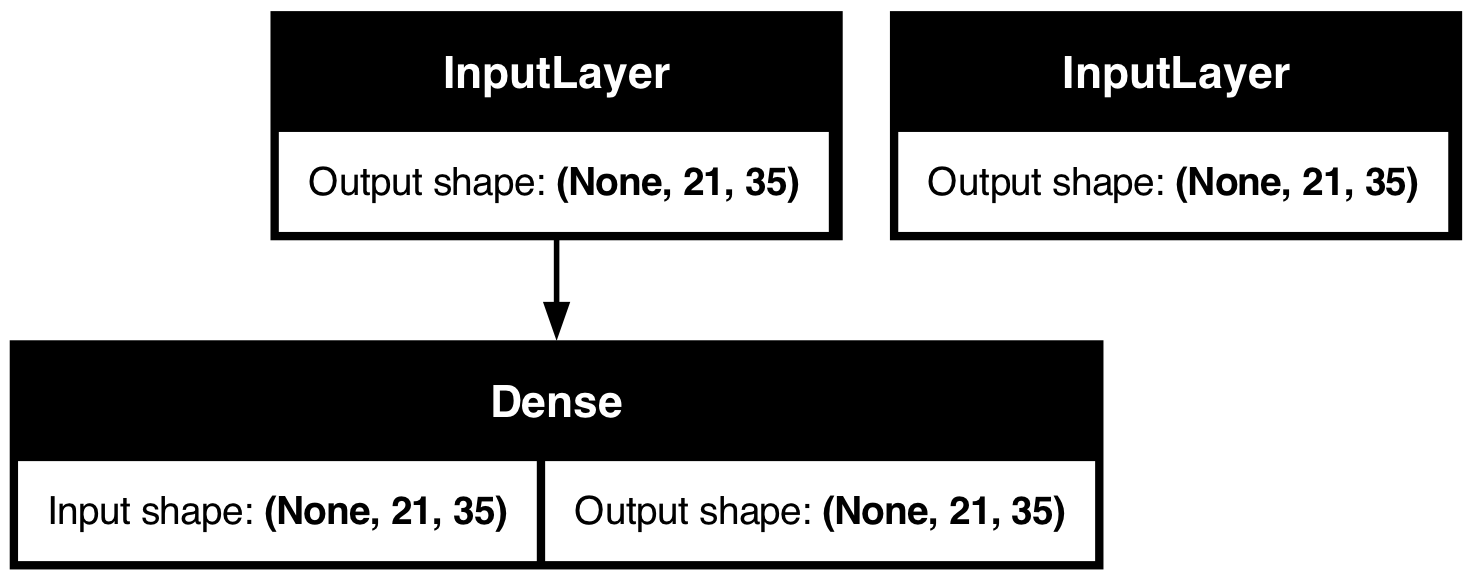

In [1099]:
tf.keras.utils.plot_model(model=model,
         show_shapes=True, to_file='./enc-dec.png')